In [1]:
import scipy.io
import pandas as pd
import numpy as np

# Function to load and structure the calibration data into a DataFrame
def load_calib_data_to_df(file_path):
    data = scipy.io.loadmat(file_path)
    
    # Extract the EEG signals and convert them to microvolts (if needed)
    cnt = 0.1 * np.array(data['cnt'], dtype=float)
    
    # Get channel labels
    clab = data['nfo']['clab'][0][0][0]
    channel_labels = [label[0] for label in clab]
    
    # Create a DataFrame
    df = pd.DataFrame(cnt, columns=channel_labels)
    
    # Extract marker positions and labels
    pos, y = None, None
    if 'mrk' in data:
        pos = data['mrk']['pos'][0][0][0]  # Marker positions
        y = data['mrk']['y'][0][0][0]  # Corresponding labels
    
    return df, pos, y

# List of all calibration files
calib_files = [
    '/Users/junaeidshoaib/Desktop/Dessertation/Dataset/Matlab_49/BCICIV_1_mat/BCICIV_calib_ds1a.mat',
    '/Users/junaeidshoaib/Desktop/Dessertation/Dataset/Matlab_49/BCICIV_1_mat/BCICIV_calib_ds1b.mat',
    '/Users/junaeidshoaib/Desktop/Dessertation/Dataset/Matlab_49/BCICIV_1_mat/BCICIV_calib_ds1c.mat',
    '/Users/junaeidshoaib/Desktop/Dessertation/Dataset/Matlab_49/BCICIV_1_mat/BCICIV_calib_ds1d.mat',
    '/Users/junaeidshoaib/Desktop/Dessertation/Dataset/Matlab_49/BCICIV_1_mat/BCICIV_calib_ds1e.mat',
    '/Users/junaeidshoaib/Desktop/Dessertation/Dataset/Matlab_49/BCICIV_1_mat/BCICIV_calib_ds1f.mat',
    '/Users/junaeidshoaib/Desktop/Dessertation/Dataset/Matlab_49/BCICIV_1_mat/BCICIV_calib_ds1g.mat'
]

# Load all calibration data
calib_dfs = []
all_marker_pos = []
all_marker_labels = []

for f in calib_files:
    df, pos, y = load_calib_data_to_df(f)
    calib_dfs.append(df)
    all_marker_pos.extend(pos)  # Combine marker positions from all files
    all_marker_labels.extend(y)  # Combine marker labels from all files

# Combine all DataFrames into one
calib_df = pd.concat(calib_dfs, ignore_index=True)

# Convert marker lists to numpy arrays
marker_pos = np.array(all_marker_pos)
marker_labels = np.array(all_marker_labels)

# Display the first few rows of the combined DataFrame
calib_df.head()


,AF3,AF4,F5,F3,F1,Fz,F2,F4,F6,FC5,...,P3,P1,Pz,P2,P4,P6,PO1,PO2,O1,O2
0,-0.3,-0.3,-0.3,-0.8,-0.4,-0.5,-0.4,0.1,0.1,-0.6,...,0.1,0.1,0.1,0.0,-0.3,0.6,0.7,0.2,0.7,0.5
1,-2.5,-2.1,-2.6,-6.3,-2.6,-3.8,-2.8,1.2,1.0,-4.3,...,1.4,0.8,0.7,0.5,-2.1,5.1,5.9,1.9,6.0,4.5
2,-3.4,-1.5,-5.2,-9.7,-2.2,-4.4,-2.2,6.0,4.9,-8.5,...,3.7,1.7,2.0,1.5,-4.7,11.5,13.3,3.7,13.0,9.8
3,2.4,4.9,-3.0,0.6,5.9,4.8,6.0,12.9,8.8,-5.9,...,4.1,1.9,2.0,2.2,-4.5,12.3,11.0,0.8,9.9,6.6
4,4.4,3.7,-1.5,5.4,9.5,8.0,7.3,12.4,4.7,-4.8,...,-0.3,-1.1,-2.4,-0.4,-5.9,10.1,2.9,-4.9,4.1,1.1


In [2]:
calib_df.shape

(1333749, 59)

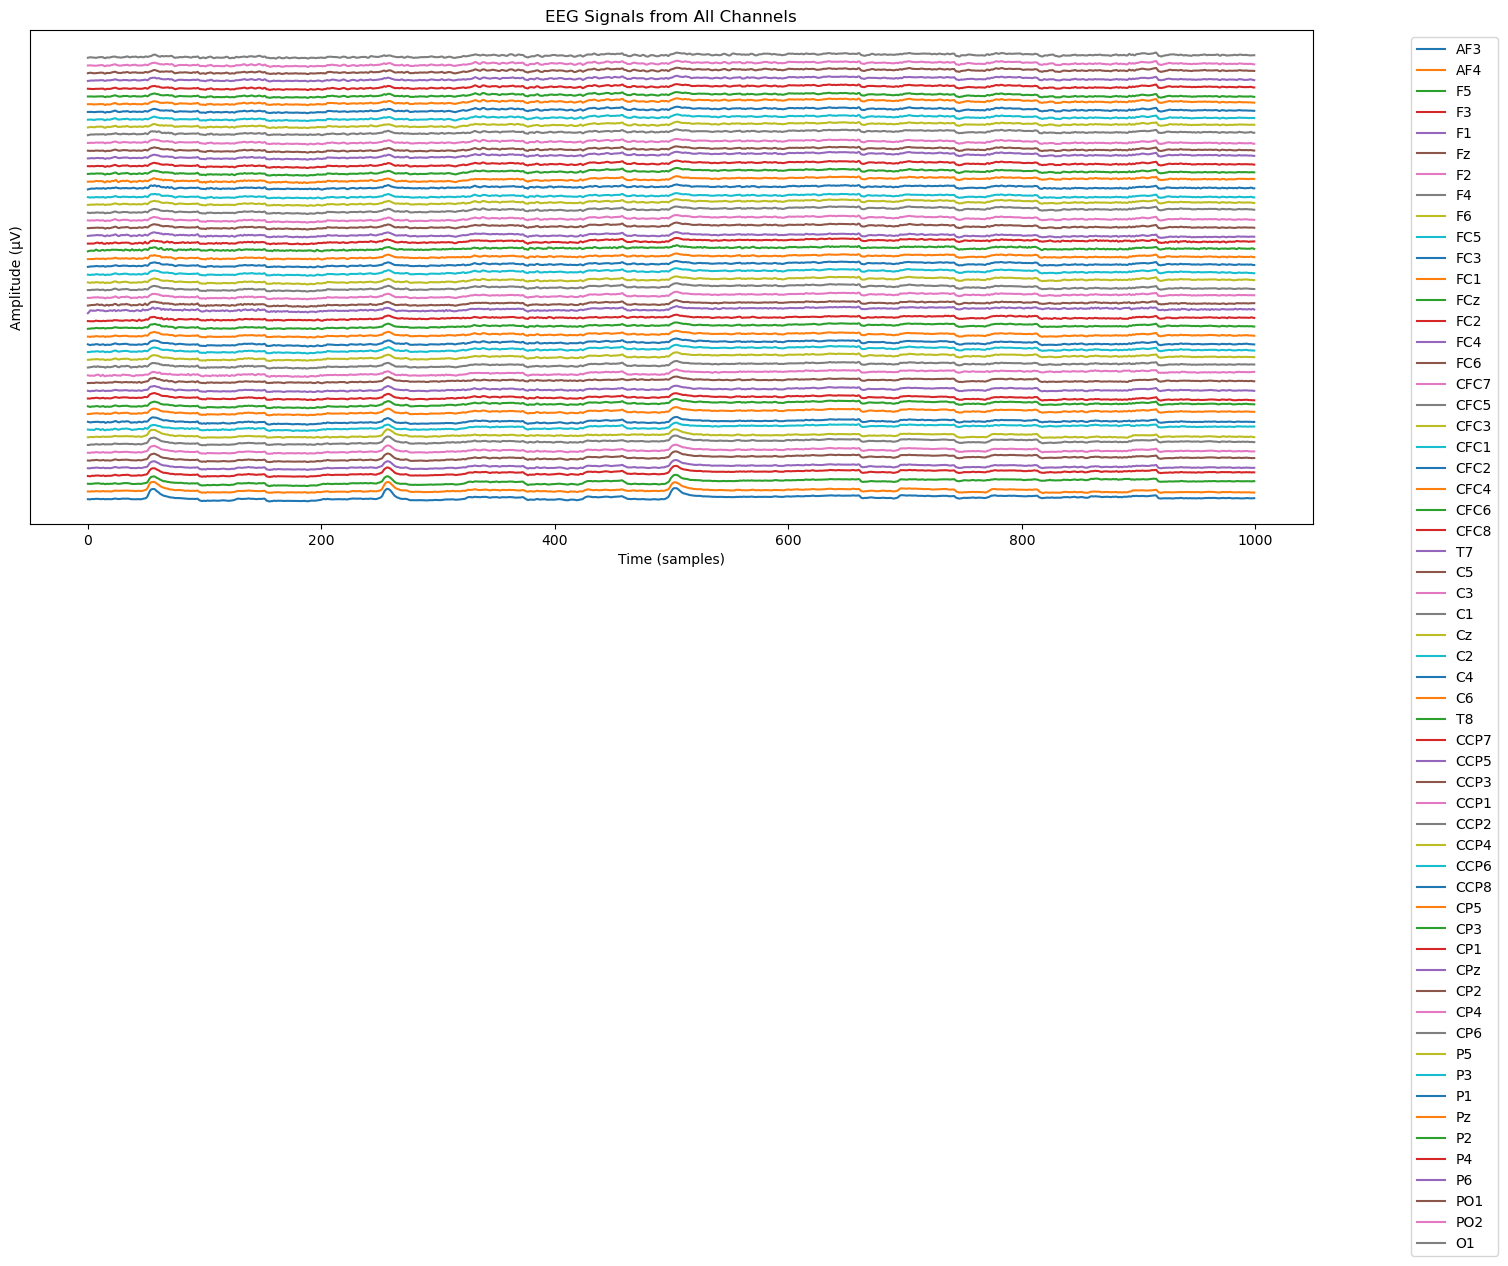

In [3]:
import matplotlib.pyplot as plt

# Define the range of samples to plot
sample_range = range(1000)  

# Get the list of all channel names 
channels = calib_df.columns[:-1]

# Set up the plot
plt.figure(figsize=(15, 10))

# Define a vertical offset for each channel
offset = 200  

# Plot each channel with a vertical offset
for i, channel in enumerate(channels):
    plt.plot(calib_df[channel].iloc[sample_range] + i * offset, label=f'{channel}')

#the plot
plt.title('EEG Signals from All Channels')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (µV)')
plt.yticks([])  # Hide y-axis labels for clarity
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=1)  # Place legend outside the plot
plt.tight_layout()

plt.show()


In [4]:
# Select specific channels
selected_channels = ['C3', 'C4', 'Cz']
calib_df_selected = calib_df[selected_channels]

# Define the window to include the baseline period and the motor imagery task
baseline_start = -200  # 2 seconds before the marker (assuming 100 Hz sampling rate)
trials_start = 0  # Start at the marker
trials_end = 400  # End 400 samples after the marker (100 Hz sampling rate, 4 seconds)

# Extract trials including the baseline period
trials = []
for i, pos in enumerate(marker_pos):
    start_idx = pos + baseline_start
    end_idx = pos + trials_end
    trial = calib_df_selected.iloc[start_idx:end_idx]
    trials.append(trial)

# Convert to a 3D array
trials_array = np.array([trial.values for trial in trials])

# Step 2: Baseline correction
baseline_corrected_trials = []
for trial in trials_array:
    baseline = trial[:200, :].mean(axis=0)  # Mean of the first 2 seconds (200 samples)
    baseline_corrected_trial = trial - baseline
    baseline_corrected_trials.append(baseline_corrected_trial)

baseline_corrected_trials_array = np.array(baseline_corrected_trials)

# Print shape of the extracted and baseline-corrected trials
print("Shape of the baseline-corrected trials array:", baseline_corrected_trials_array.shape)




Shape of the baseline-corrected trials array: (1400, 600, 3)


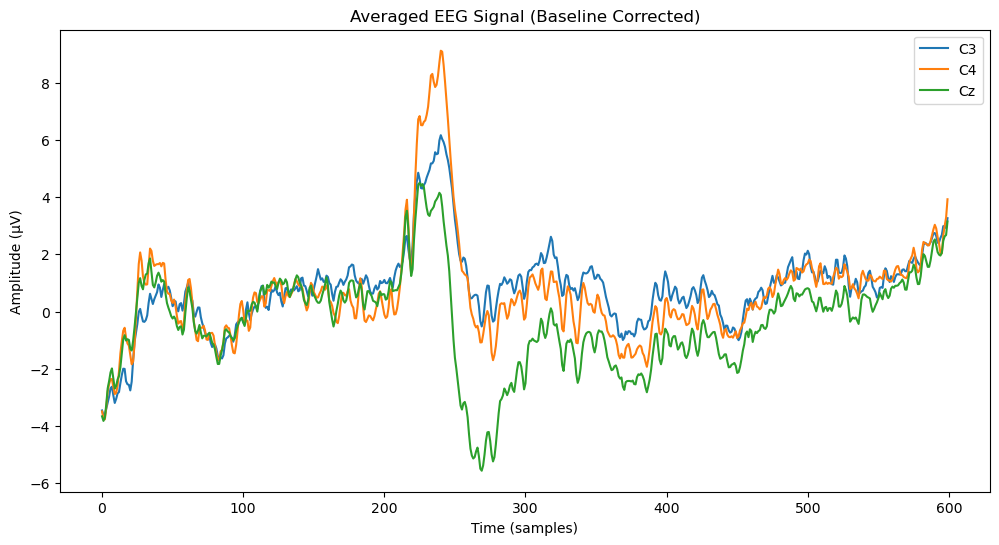

In [5]:
# Averaging across trials
avg_c3 = baseline_corrected_trials_array[:, :, 0].mean(axis=0)
avg_c4 = baseline_corrected_trials_array[:, :, 1].mean(axis=0)
avg_cz = baseline_corrected_trials_array[:, :, 2].mean(axis=0)

#Plotting the averaged signals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(avg_c3, label='C3')
plt.plot(avg_c4, label='C4')
plt.plot(avg_cz, label='Cz')
plt.title('Averaged EEG Signal (Baseline Corrected)')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (µV)')
plt.legend()
plt.show()

In [6]:
# Define the ERD time window based on visual inspection
erd_start = 200  
erd_end = 350  

# Prepare lists to hold ERD features and corresponding labels for all trials
X = []  # Feature vectors for all trials
y = []  # Labels for all trials

# Iterate over each baseline-corrected trial
for i, trial in enumerate(baseline_corrected_trials_array):
    # Extract the signals for C3, C4, and Cz channels within this trial
    c3_signal = trial[:, 0]  # C3 channel
    c4_signal = trial[:, 1]  # C4 channel
    cz_signal = trial[:, 2]  # Cz channel
    
    # Extract the ERD features using the identified ERD time window
    erd_features_c3 = c3_signal[erd_start:erd_end]
    erd_features_c4 = c4_signal[erd_start:erd_end]
    erd_features_cz = cz_signal[erd_start:erd_end]
    
    # Combine features from all channels into a single feature vector
    erd_features = np.concatenate([erd_features_c3, erd_features_c4, erd_features_cz])
    X.append(erd_features)
    
    # Append the corresponding label for this trial
    y.append(marker_labels[i])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Print shapes to verify
print("Shape of X (feature matrix):", X.shape)
print("Shape of y (labels):", y.shape)

# Now X and y can be used for training and evaluating a classifier


Shape of X (feature matrix): (1400, 450)
Shape of y (labels): (1400,)


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Optionally, print a few sample data points to inspect
print("\nSample of X_train:")
print(X_train[:2])  # Print first 2 training samples

print("\nSample of y_train:")
print(y_train[:2])  # Print first 2 training labels

print("\nSample of X_test:")
print(X_test[:2])  # Print first 2 test samples

print("\nSample of y_test:")
print(y_test[:2])  # Print first 2 test labels


Shape of X_train: (1120, 450)
Shape of y_train: (1120,)
Shape of X_test: (280, 450)
Shape of y_test: (280,)

Sample of X_train:
[[ 2.36300e+00  4.63000e-01  7.76300e+00  1.24630e+01  3.56300e+00
  -1.25370e+01 -1.88370e+01 -1.13370e+01 -4.43700e+00 -1.23700e+00
  -2.37000e-01 -4.13700e+00 -5.73700e+00 -2.93700e+00 -3.43700e+00
  -3.63700e+00  4.63000e-01  4.76300e+00  5.76300e+00 -1.53700e+00
  -7.03700e+00 -1.37370e+01 -2.09370e+01 -8.13700e+00  2.96300e+00
   5.36300e+00  1.04630e+01  8.66300e+00  1.96300e+00 -1.31370e+01
  -2.55370e+01 -2.62370e+01 -2.53370e+01 -1.39370e+01 -5.37000e-01
   5.66300e+00  8.46300e+00  1.46300e+00 -4.03700e+00 -1.10370e+01
  -2.29370e+01 -2.60370e+01 -2.72370e+01 -2.92370e+01 -2.56370e+01
  -1.29370e+01 -7.33700e+00 -1.94370e+01 -2.74370e+01 -2.55370e+01
  -1.66370e+01 -9.43700e+00 -1.03370e+01 -1.46370e+01 -2.30370e+01
  -2.04370e+01 -4.23700e+00  6.16300e+00  9.46300e+00  5.36300e+00
  -6.93700e+00 -1.52370e+01 -1.61370e+01 -1.62370e+01 -1.87370e+01
 

In [8]:
import numpy as np
# Verify that the labels are distributed properly
unique, counts_train = np.unique(y_train, return_counts=True)
unique, counts_test = np.unique(y_test, return_counts=True)
unique, counts_full = np.unique(y, return_counts=True)

# Print the distribution of labels
print("Distribution of labels in the full dataset:")
print(dict(zip(unique, counts_full)))

print("\nDistribution of labels in the training set:")
print(dict(zip(unique, counts_train)))

print("\nDistribution of labels in the test set:")
print(dict(zip(unique, counts_test)))

Distribution of labels in the full dataset:
{-1: 700, 1: 700}

Distribution of labels in the training set:
{-1: 557, 1: 563}

Distribution of labels in the test set:
{-1: 143, 1: 137}


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Perform a stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Initialize the SVM model
svm = SVC(kernel='rbf', C=0.057704, gamma = 0.1)

# Train the model on the training data
print("Training the SVM model...")
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

# Optional: Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Shape of X_train: (1120, 450)
Shape of y_train: (1120,)
Shape of X_test: (280, 450)
Shape of y_test: (280,)
Training the SVM model...
Test Set Accuracy: 49.29%

Classification Report:
              precision    recall  f1-score   support

          -1       0.47      0.12      0.19       140
           1       0.50      0.86      0.63       140

    accuracy                           0.49       280
   macro avg       0.48      0.49      0.41       280
weighted avg       0.48      0.49      0.41       280



In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Train the model on the training data
lda.fit(X_train, y_train)

# Predict on the test data
y_pred = lda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"LDA Test Set Accuracy: {accuracy * 100:.2f}%")

# Optional: Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


LDA Test Set Accuracy: 51.43%

Classification Report:
              precision    recall  f1-score   support

          -1       0.51      0.50      0.51       140
           1       0.51      0.53      0.52       140

    accuracy                           0.51       280
   macro avg       0.51      0.51      0.51       280
weighted avg       0.51      0.51      0.51       280



In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the k-NN model
knn = KNeighborsClassifier(n_neighbors=200)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"k-NN Test Set Accuracy: {accuracy * 100:.2f}%")

# Optional: Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


k-NN Test Set Accuracy: 52.50%

Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.81      0.63       140
           1       0.56      0.24      0.33       140

    accuracy                           0.53       280
   macro avg       0.54      0.53      0.48       280
weighted avg       0.54      0.53      0.48       280

